<a href="https://colab.research.google.com/github/auud7502/Machine_learning/blob/main/Template_machine_learning/Clustering/K-Means/Copy_of_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values # here we are taking 2 features : 3 and 4
# x axis 1st feature and y axis 2nd feature

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

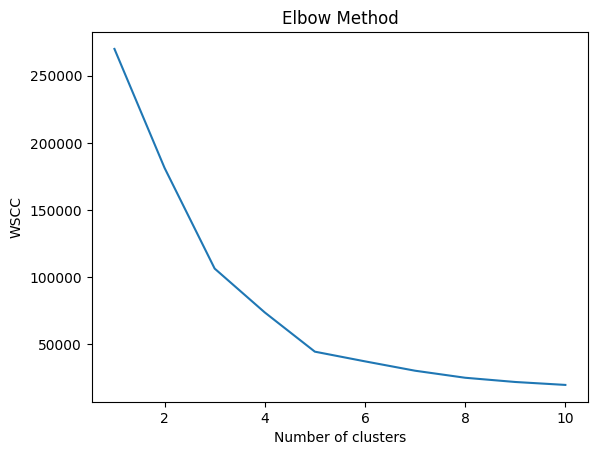

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x) # it not only trains the kmeans model on dataset but also it returns the dependent variable


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

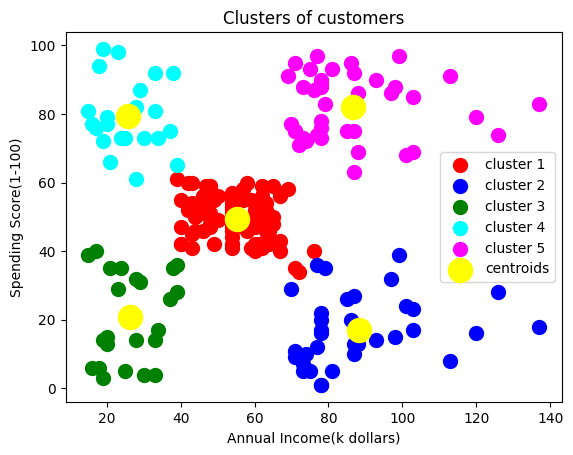

In [13]:
plt.scatter(x[y_kmeans == 0 ,0], x[y_kmeans==0,1], s =100, c= 'red', label = 'cluster 1')  # [rows,columns]
plt.scatter(x[y_kmeans == 1 ,0], x[y_kmeans==1,1], s =100, c= 'blue', label = 'cluster 2')
plt.scatter(x[y_kmeans == 2 ,0], x[y_kmeans==2,1], s =100, c= 'green', label = 'cluster 3')
plt.scatter(x[y_kmeans == 3 ,0], x[y_kmeans==3,1], s =100, c= 'cyan', label = 'cluster 4')
plt.scatter(x[y_kmeans == 4 ,0], x[y_kmeans==4,1], s =100, c= 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label='centroids') #   We can use kmeans class to get x and y of centroid of each cluster..
                                                                       #0 is 1st column of cluster center array and 1 is 2nd column of cluster center array
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k dollars)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()